# Taylorpolynome

## Auftrag

* Sie können Funktionen mit Taylorpolynomen approximieren.
* Sie können mathematische Sachverhalte mit Matplotlib visualisieren.

Visualisieren Sie die Approximation einer Funktion durch Taylorpolynome (z.B. von $sin(x)$ oder von $ln(x+1)$. Schreiben Sie eine Python-Funktion, die die Graphen der Ursprungsfunktion sowie der Taylorpolynome bis zu einem bestimmten Grad mit Matplotlib visualisiert.

## Umgebung

Damit die Snippets funktionieren, müssen die folgenden Python-Module installiert sein.

* Sympy
* Matplotlib
* NumPy

In [92]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [93]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [94]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


### SymPy
SymPy ist eine Python-Programmierbibliothek für symbolische mathematische Berechnungen *(Sympy, 2019)*.

### Matplotlib
Bei **Matplotlib** handelt es sich um eine Programmbibliothek für die Programmiersprache Python. **Matplotlib** ermöglicht eine graphische Darstellung sämtlicher mathematischen Funktionen und vielem mehr. Die erstellten Graphen können mit wenig Aufwand so konfiguriert werden, dass sie für fast alle Anwendungsbereiche geeignet sind *(Matplotlib, 2019)*.

### NumPy
Bei **NumPy** handelt es sich um eine Programmbibliothek für die Programmiersprache Python. Diese Bibliothek ermöglicht eine einfache Handhabung von grossen mehrdimensionalen Arrays. Dazu bietet NumPy effiziente Implementierungen von mathematischen Funktionen *(Numpy, 2019)*.

## Grundlegendes zu Taylerpolynomen

### Theorie

Durch die Tangente kann eine Funktion an einer Stelle $x_0$ angenähert werden. Diese Approximation ist jedoch nur an einem Punkt genau. Diese Approximation ist oftmals nicht exakt genug. Um eine glatte Funktion zu erhalten werden deshalb Polynome höheren Grades verwendet, sogenante Taylorplynome. Das Bild [Bild 1] zeigt die Funktion $f(x)=sin(x)$ sowie eine Approximation an der Stelle $x_0=0$ durch ein Taylorppolynom. Die Tangente, sprich die Funktion $f(x)=x$, ergibt bereits eine Approximation um die $x_0$-Stelle. Jedoch steigt der die Abweichung vom Taylorpolynom zur Funktion sehr schnell, je weiter man sich von der $x_0$-Stelle wegbewegt. Besser ist ein Polynom fünften Grades, wie es die Funktion $f(x)=x-\frac{x^3}{6}+\frac{x^5}{120}$ auf [Bild 1] zeigt im Gegenzug zur Tangente *(Weitz E., 2018)*.  
![Bild 1](img/sin_taylorpolynom5_tangente.png)   
"[Bild 1] Beispiel Tangente und Taylorpolynom Grad 5 der $sin(x) Funktion$"  
Als Basis wird ein Polynom in dieser Form verwendet *(Weitz E., 2018)*:  

$$T_n(x)=\sum_{k=0}^{n}a_k(x-x_0)^k=a_0+a_1(x-x_0)+...+a_n(x-x_0)^n$$

Damit kann nun die Funktion an der Stelle von $x_0$ durch ein Polynom von Grad $n$ approximiert werden. Was dazu noch fehlt sind die Koeffizienten $a_0$, $a_1$ bis $a_n$. Um diese zu bestimmen, kann die allgemeine Formel verwendet werden *(Weitz E., 2018)*.  

$$a_k=\frac{f^{(k)}(x_0)}{k!}$$


Dies fürht zu der generellen Definitoin eines Taylorpolynoms *(Weitz E., 2018)*:  

$$T_n(x)=\sum_{k=0}^{n}\frac{f^{(k)}(x_0)}{k!}=f(x_0)+f'(x_0)(x-x_0)+...+\frac{f^{(n)}(x_0)}{n!}(x-x_0)^n$$

Die Genauigkeit des Taylorpolynoms wird nun durch den gewählten Grad definiert. Je höher dieser gewählt wird, desto genauer stimmet das Polynom um die Stelle $x_0$ mit der Ursprungsfunktion überein. Der maximal wählbare Grad ist abhängig von der Differenzierbarkeit der Ursprungsfrunktion *(Weitz E., 2018)*.

### Praktische Anwendung
Die Anwendung in der Praxis für Taylorpolynome liegt darin, dass sehr komplexe Funktionen, die unter Umständen sehr hoge Rechenleistung benötig, durch eine einfachere Funktion ersetzt werden kann. Wird eien Funktion nur in einem bestimmten Bereich benötigt, kann diese ensprechend genau mit einem Taylorpolynom nachgestellt werden. Somit vereinfacht sich die komplexe Funktion und man erhält trozdem dieselbe Resultate wie mit der Ursprungsfunktion.  
Es wurden Taylorpolynome entwickelt für die Nachkommastellen berechnung von Pi. Gregory und David Chudnovsky haben 1989 ein Taylorpolynom erstellt, welches mit jedem Grad 14 korrekte Dezimallstellen berechneten *(Weitz E., 2018)*.  


$$\frac{1}{\pi}=12\sum_{k=0}^{\infty}\frac{(-1)^k(6k)!(13591409+545140134k)}{(3k)!(k!)^3*640320^{3k+\frac{3}{2}}}$$


## Taylorpolynome mit Sympy
In dem folgendem Snippet befindet sich eine Python-Funktion, welche ein Taylorpolyom bis zu einem bestimmten Grad berechnet und visualisiert. 

In [95]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math


def zeichne_taylorpolynom(f, start, ende, x0, grad):
    """ 
    Plottet für die angegebene Funktion sowie des ensprechende Taylorpolynom im angegebenen Grad.
    @param: Funktion f: Sympy-Funktion als mathematischen Ausdruck
    @param: int start: Startwert der Grafik
    @param: int ende: Endwert der Grafik
    @param: float x0: x-Stelle an der Approximiert werden soll
    @param: int grad: Grad des Taylorpolynoms
    """
    
    # x-Werte definieren
    x_werte = np.linspace(start, ende, 200)
    
    # y-Werte generieren für Ursprungsfunktion
    y_werte_ursprungsfunktion = [ f.subs(x, x_wert) for x_wert in x_werte]
        
    # Ursprungsfunktion plotten
    plt.plot(x_werte, y_werte_ursprungsfunktion, label='Ursprungsfunktion')
    
    # Taylorpolynom berechnen
    n = 0
    taylorpolynom = 0
    while n <= grad:
        # n-te Ableitung
        ableitung = sp.diff(f, x, n)
        # Taylorpolynom Stückweise zusammensetzen
        taylorpolynom = taylorpolynom + ((ableitung.subs(x, x0))/math.factorial(n))*((x-x0)**n)
        n += 1
    
    # y-Werte generieren für Taylorpolynom
    y_werte_taylorpolynom = [ taylorpolynom.subs(x, x_wert) for x_wert in x_werte]
    
    # Taylorpolynom plotten
    plt.plot(x_werte, y_werte_taylorpolynom, label='Taylorpolynom Grad ' + str(grad))
    
    # Grafik aufbereiten
    plt.ylim([-2, 2])
    plt.xlabel('x-Achse')
    plt.ylabel('y-Achse')
    plt.legend()
    plt.grid(True)
    plt.title('Taylorpolynom Grad ' + str(grad))
    plt.show()

### Beschreibung Python Funktion
Zubeginn der Funktion werden 200 x-Werte zwischen `start` und `ende` generiert. Danach wird für jeden generierten x-Wert den Funktionswert der Funktion `f` berechnet. Dies wird mittels Sympy-Funktion gemacht `f.subs(x, x_wert)`. Dabei werden alle `x` inder Funktion druch den Zahlenwert `x_wert`ersetzt. Die berechneten Funktionswerte werden in einer neuen Liste `y_werte` zwischengespeichert. Mit den x- und y-Werten wird die Urspungsfunktion gezeichnet.  
Danach wird das n-te Taylorpolynom berechnet. Dies geschiet anhand der mathematischen Formel wie sie im Kapitel "Theorie" beschreiben wurde. Dazu wird in einer Schleife von null bis zum gewünschten Grad die Ableitung mittels der Sympy-Funktion `diff` erstellt. Anschliessend wird das Polynom stückweise zusammengesetzt. Nachdem das Taylorpolynom berechnet wurde, werden für alle x-Werte wieder die y-Werte berechnet. Dies geschiet wieder über die Sympy-Funktion `subs`. Mit den x- und y-Werten wird das Taylorpolynom des n-te Grad gezeichnet.  
Für die Berechnung des Taylorpolynoms könnte direckt eine Sympy-Funktion verwendet werden:  
`taylorpolynom = f.series(x, x0, grad).removeO()`

### Auswertung
Um die Funktion zu testen werden jeweils mit den gleichen Parametern die Funktion `zeichne_taylerpolynom` aufgerufen. Nur der Grad wird schrittweise erhöht. Als zu Aproximierende Funktion wurde eine einfache $f(x)=sin(x)$ mit der Stelle $x_0$ ausgewählt. Die Start- und Endwerte wurden mit minus zehn und plus zehn bestimmt. Somit ist kann die Approximation auf beinen Richtungen der x-Achse getestet werden. 

In [96]:
"""
Parameter definieren.
"""
x = sp.Symbol('x')
f = sp.sin(x)
start, ende = -10, 10
x0 = 0.0

#### Taylorpolynom Grad 0
Die einfachste Variante ist ein Polynom 0-ten Grades. Diese Approximation stimmt bei der $x_0$-Stelle zwar, jedoch steigt der Fehler schnell an, je weiter weg man von der $x_0$-Stelle misst. Die Funktion lautet: $f(x)=0$

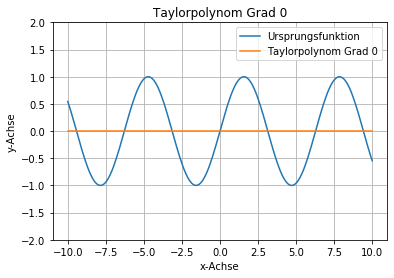

In [97]:
zeichne_taylorpolynom(f, start, ende, x0, 0)

#### Taylorpolynom Grad 1
Eine bessere Approximation wird mit dem Polynom 1-ten Grad erzielt. Bei dem Taylorpolynom Grad 1 handelt es sich um die Tangente und es wird schon eine sehr gute Approximation im Bereich von -1.5 und 1.5 erreicht. Die Funktion lautet: $f(x)=x$

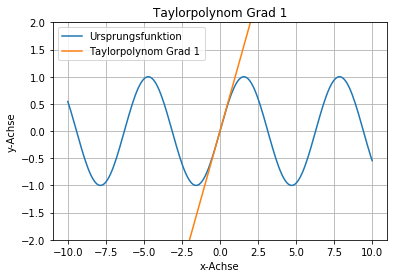

In [98]:
zeichne_taylorpolynom(f, start, ende, x0, 1)

#### Taylorpolynom Grad 5
Beim Polynom 5-ten Grades wird bereits in einem Bereich von -2 und 2 gut approximiert. Die Funktion lautet: $f(x)=x-\frac{x^3}{3!}+\frac{x^5}{5!}$

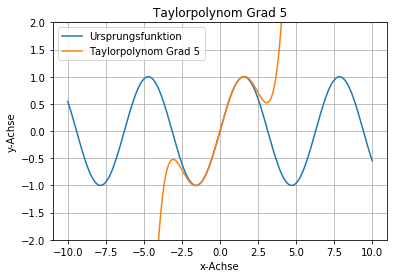

In [99]:
zeichne_taylorpolynom(f, start, ende, x0, 5)

#### Taylorpolynom Grad x
Mit einem Taylorpolynom des x-ten Grades kann die Sinusfunktion im gesammten definierten Bereich von -10 und 10 approximiert werden. Die Funktion lautet: $$f(x)=x-\frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!}+...-\frac{x^27}{27!}$

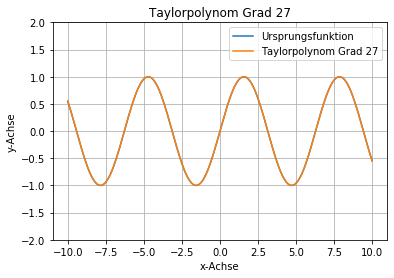

In [100]:
zeichne_taylorpolynom(f, start, ende, x0, 27)

## Fazit
Wie an den Grafiken ersichtlich ist, steigt die Genauigkeit der Approximation um die $𝑥_0$-Stelle mit dem Erhöhen des Grades des Polynoms kontinuierlich an. Es stellt sich jedoch die Frage, wie weit der Grad erhöt werden kann, ohne merklichen Performance-Verluste. Es ist in der Praxis höchstwahrscheinlich nur sinnvoll, einen niedrigen Grad zu wählen. Es sollte darauf geachtet werden, dass die Funktion nur Werte im genauen Bereich um die $𝑥_0$-Stelle berechneen.

## Litaraturverzeichnis
Matplotlib. (2019). *Matplotlib*. Abgerufen am 12.04.2020 von https://matplotlib.org/  
https://pypi.org/project/PTable/   
Sympy. (2019). *Sympy*. Abgerufen am 12.04.2020 von https://www.sympy.org/en/index.html  
NumPy Developers. (2019). *NumPy*. Abgerufen am 12.04.2020 von https://numpy.org/  
Edmund Weitz. (2018). *Konkrete Mathematik (nicht nur) für Informatiker*. Springer Fachmedien Wiesbaden GmbH